<a href="https://colab.research.google.com/github/Giuliamacis/Finance-and-financial-technologies/blob/main/finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
#create the tickers for each company
ferragamo = yf.Ticker('SFER.MI')
lvmh= yf.Ticker('MC.PA')
#display historical market data of ferragamo and lvmh
data= yf.download(['SFER.MI','MC.PA'], period='5y',interval="1d")
#now lets see also dividends and stock splits
data_ferragamo=ferragamo.history(period="5y", interval="1d")
data_lvmh=lvmh.history(period="5y", interval="1d")


[*********************100%%**********************]  2 of 2 completed


In [ ]:
import pandas as pd
dividends_lvmh = lvmh.dividends
# Convert the Series into a DataFrame
data = pd.DataFrame(dividends_lvmh)
data.reset_index(inplace=True)  # Resets the index, making 'Date' a column
data['Year'] = data['Date'].dt.year  # Extracts the year from the 'Date' column
# Group by 'Year' and sum the dividends for each year
annual_dividends_sum_lvmh = data.groupby('Year')['Dividends'].sum()
annual_dividends_sum_lvmh['2024']=14.178 #bloomberg
annual_dividends_sum_lvmh

Year
2019     2.200
2020     4.600
2021     7.000
2022    12.000
2023    12.500
2024     7.500
2024    14.178
Name: Dividends, dtype: float64

In [ ]:
dividends_f = ferragamo.dividends
# Convert the Series into a DataFrame
data = pd.DataFrame(dividends_f)
data.reset_index(inplace=True)  # Resets the index, making 'Date' a column
data['Year'] = data['Date'].dt.year  # Extracts the year from the 'Date' column
# Group by 'Year' and sum the dividends for each year
annual_dividends_sum_f= data.groupby('Year')['Dividends'].sum()
annual_dividends_sum_f['2024']=0.096 #bloomberg
annual_dividends_sum_f

Year
2019    0.340
2022    0.340
2023    0.280
2024    0.096
Name: Dividends, dtype: float64

# **STOCK EVALUATION LVMH**
##DDM MODEL

###COST OF EQUITY EVALUATION
In order to discount the dividends of the firm, we must find the right cost of equity.
We use the CAPM model for this evaluation following this formula: expected return=Rf+beta (Rm-Rf)
where:

Rf is the risk free rate of return, in our case we can either use the yield of French government bonds or the yield of german bunds.
We decided to use the 10-year Bund yield, as Germany's government bonds are often used as a proxy for the risk-free rate in the Eurozone due to Germany's strong economic position.
Moreover, For evaluating LVMH's stock, the 10-year Bund yield is typically the most appropriate choice. This is because stock investments are generally considered long-term, and the 10-year yield aligns with the long-term horizon of equity investments. It provides a stable, long-term benchmark for the risk-free rate, capturing broader, long-term economic expectations, which is essential for accurately discounting future dividends back to their present value.

**Rf=2.29%**

Rm is the expected return of the market portfolio
Rm-Rf is the market risk premium. The market risk premium is the additional return expected from holding a risky market portfolio instead of risk-free assets.
We have found this value for France  in the section called 'Country Default Spreads and Risk Premiums' by Aswath Damodaran and it's **5.32%**

 https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/ctryprem.html

  https://www.worldgovernmentbonds.com/country/germany/?utm_content=cmp-true https://www.bloomberg.com/markets/rates-bonds/government-bonds/germany

Now we can plug the values into the CAPM formula, retrieving also lvmh's beta value


In [ ]:
r=0.0229+lvmh.info['beta']*0.0532
r

0.0756744

In [ ]:
ferragamo.info['beta']

1.248

The cost of equity found for lvmh is then **7.57%**.
The value seems pretty fair, but can double check it by calculating the average historical returns of the french index (CAC40), considering it as a good future estimate.
We take the last 30 years historical returns of the CAC40 index (from January 1994 to January 2024) and use the following formula:

r= [(January 2024 returns/January 1994 returns)^1/30]-1

Let's plug into the formula the values found in the website below

https://curvo.eu/backtest/it/indice/cac-40?currency=eur

In [ ]:
r2 = ((120489 / 14629) ** (1 / 30)) - 1
r2

0.07281398271245987

We can now say that the estimate we computed before is accuarate, and we will move one considering 7.57% as the cost of equity for lvmh.

###g EVALUATION
Our next step in the stock evaluation process is determing the growth we will use in the DDM model.
We need to find a rough estimate of g for a perpetuity.
Our approach is to sum the expected inflation rate and the real growth rate. This approach is based on the Fisher Equation, which relates nominal and real interest rates under the influence of inflation.
This makes us understand how much the nominal dividends are expected to grow, combining both the real growth in the value of the firm's distributions and the expected decrease in the purchasing power of money.
The expected inflation rate that the banks aim to reach 2% ,
while real growth rate we try 2 values 3% with an optimistic mindset as LVMH is a strong growth firm. We also try a more pondered value 2%, considering also the problems that it is facing in relation to the market.
so we can estimate a growth between 4% and 5%.
We will check the price using both extremes of the interval, to see what best suits the evaluation.

###DDM MODEL
Our first method of stock evaluation is the dividend discount model,that is based on the theory that a firm's stock is worth the sum of all its future dividend payments, discounted back to their present value. Essentially, it calculates the present value of the expected dividends of the stock.
The basic formula of the DDM is:
P=D1/r-g
where:
P=is the current stock price,
Div1 is the expected dividend in the next year (2025),
r is the discount rate (cost of equity), that we calculated before
g is the nominal growth rate of the dividends.
The model assumes that dividends will continue to grow at a constant rate indefinitely.
NOtice that LVMH pays dividends twicea year, so the annual dividend is just the sum of the 2.
LVMH hasn't paied the second dividend of the year yet, so in order to get more accuarate evaluation we decided to use the 2025 annual dividend value forecasted by Bloomberg instead of calculating it manually (div_2025=div_20204*(1+g))

In [ ]:
P1=14.178/(r-0.04)
P2=14.178/(r-0.05)

Howerver assuming that the dividend will grow forever with a constant growth is a strong assumption that could lead to a less accuarate evaluation.

A different option could be using the multi-staged DDM, discounting to the present the available estimation of the future dividends, and then assuming that the dividend of 2027,which is the last dividend experts forecasted on bloomberg, will grow forever with constant growth.

In [ ]:
P3 =( 14.178/ (1 + r)) + (15.861/ (1 + r)**2) + (17.123/ (1 + r)**3) + (21.115/ (1 + r)**4) + ((21.115* (1 + 0.04)/ (r - 0.04))* 1/(1+r)**4)
P4 = ( 14.178/ (1 + r)) + (15.861/ (1 + r)**2) + (17.123/ (1 + r)**3) + (21.115/ (1 + r)**4) + ((21.115* (1 + 0.05)/ (r - 0.05))* 1/(1+r)**4)

In [ ]:
stock_prices= pd.DataFrame({
    "perpetuity": [P1, P2],
    "multi-staged": [P3, P4]
}, index=["price with g=4%", "price with g=5%"])

stock_prices

,perpetuity,multi-staged
price with g=4%,397.427847,516.191153
price with g=5%,552.223226,701.412742


The table summarizes the variuos methods used to evaluate lvmh's stock price.
We clearly see that this model underestimate the stock value,which is around €800.
Comparing the 1 stage and 2-staged models, the former perform worse as it takes strong assumptions on the growth of dividends.
We can also notice that a growth of 5% is more suitable.

Although the Dividend Discount Model was applied, we anticipated poor performance in accurately valuing LVMH's stock due to the company's minimal dividend payouts. Consequently, the model's reliance on dividends to determine stock value does not effectively represent the true value of LVMH shares, given the company's broader financial performance and growth prospects.
Thus,an evaluation based on comparables, which considers market values, may offer a more suitable approach for our stock assessment. This method incorporates broader market indicators and comparable company analyses, potentially providing a more accurate reflection of the stock's value.



---

## FCFE LVMH

The FCFE metric is often used by analysts in an attempt to determine the value of a company. This method of valuation gained popularity as an alternative to the dividend discount model (DDM), especially if a company does not pay a dividend.


In [ ]:
cf_lvmh=lvmh.cash_flow
FCF_lvmh = cf_lvmh.loc['Free Cash Flow']
FCF_lvmh = pd.DataFrame (FCF_lvmh)
#FCF_lvmh.index = [2022,2021,2020]
FCF_lvmh = FCF_lvmh.sort_index()
FCF_lvmh

,Free Cash Flow
2020-12-31,8433000000.0
2021-12-31,15392000000.0
2022-12-31,12753000000.0
2023-12-31,10596000000.0


In [ ]:
g= 0.05
pv_fcf = (17681000000 / (1 + r)) + (20101000000 / (1 + r)**2) + (23080000000 / (1 + r)**3) + (( (23080000000* (1+g)) / (r - g)) * (1 / (1 + r)**3))
pv_fcf
net_debt = 27181000000
equity = pv_fcf - net_debt
pps = equity / lvmh.info.get('sharesOutstanding')
pps

1568.5215347326807



---



##**EVALUATION BY COMPARABLES LVMH**

In [ ]:
# @title
comparables = ['MC.PA' ,'KER.PA', 'RMS.PA', 'CFR.SW', 'CDI.PA', 'BRBY.L']


tickers = comparables

financials = {}
# Loop through each ticker symbol
for ticker in tickers:

  # Fetch the ticker object
  obj = yf.Ticker(ticker)

  # Get the company's financial information
  info = obj.info

  # Get the historical prices for this ticker, '1d' for the latest available day
  tickerDf = obj.history(period='1d')

  # Get the last closing price
  if ticker != 'MC.PA':
    closingPrice = tickerDf['Close'].iloc[-1]
  else:
    closingPrice = None

  # Populate our financials dictionary with the data
  financials[ticker] = {
      'P/B': info.get('priceToBook'),
      'DivYield': info.get('dividendYield'),
      'EPS': info.get('trailingEps'),
      'P/E': info.get('trailingPE'),
      'StockPrice': closingPrice  # Adding the last closing price
  }

# Convert to DataFrame
df_financials = pd.DataFrame (financials).T

df_financials


,P/B,DivYield,EPS,P/E,StockPrice
MC.PA,6.485310,0.0164,30.34,26.110744,NaN
KER.PA,2.723251,0.0414,24.37,13.867460,337.950012
RMS.PA,16.190817,0.0064,41.13,57.135910,2350.000000
CFR.SW,3.914682,0.0193,6.71,19.351715,129.850006
CDI.PA,6.210087,0.0175,34.90,21.232090,741.000000
BRBY.L,381.583300,0.0545,1.19,9.680673,1152.000000


In [ ]:
comparables = df_financials.drop('MC.PA')
#P/E method
avg_pe = comparables['P/E'].mean()
price_pe= df_financials['EPS'][0]*avg_pe
price_pe

735.853301664

In [ ]:

#P/B method
avg_pb = comparables['P/B'].mean()
bv=lvmh.balance_sheet.loc['Total Assets'] - lvmh.balance_sheet.loc['Total Liabilities Net Minority Interest']
bvps=bv[0]/lvmh.info.get('sharesOutstanding')
price_pb=bvps*avg_pb
price_pb

10307.988799205734

From the result above, the price is clearly overestimated and looking at the P/B ratios of the comparables, it makes sense since Burberry's P/B ratio is significantly higher than the others. This might compromise the P/B ratio mean and therefore the final price stock estimation. Thus, we replicate the estimation excluding Burberry.

In [ ]:
comparables1 = df_financials.drop('BRBY.L')

#P/B method
avg_pb = comparables1['P/B'].mean()
bv=lvmh.balance_sheet.loc['Total Assets'] - lvmh.balance_sheet.loc['Total Liabilities Net Minority Interest']
bvps=bv/lvmh.info.get('sharesOutstanding')

price_pb1=lvmh.info.get('bookValue')*avg_pb

price_pb1


867.8762330273801

In [ ]:
#DDM comparables

avg_dy = comparables['DivYield'].mean()

#note that r-g = dividend yield

price_dy=annual_dividends_sum_lvmh.iloc[5]/avg_dy

price_dy

269.5902247993546



---



#**BONDS EVALUATION LVMH**

LVMH has issude few bonds over the past years.

For instance we can try evaluate the price of the bond issued in September 2023,with maturity in 2033.
The residual maturity (from now to 2033) is then 9 years.
this bond has coupon of 3.5, and AA- rating, indicating a very high credit quality and a very low risk of default.

The yield to maturity (YTM) of the bond can be estimated by adding the risk-free rate to a credit spread that reflects the bond's credit rating and maturity. For this particular bond, we can reference the 10-year German Bund as the benchmark for the risk-free rate, which currently stands at 2.29%. Given the bond's AA- rating and 10-year maturity, the applicable credit spread is 0.82%.

Therefore, the YTM for LVMH's bond, which is an essential indicator of the return investors can expect if they hold the bond until it matures, is calculated by summing the risk-free rate (2.29%) and the credit spread (0.82%). This method provides a comprehensive measure of the bond's yield, taking into account both the general market interest rate environment and the specific credit risk associated with LVMH's bond.

In [ ]:
YTM_lvmh=(0.0229+0.0081)
YTM_lvmh

0.031

Now we have all ingriedients to calculate the bond's price

In [ ]:
discount_factor=1+YTM_lvmh
Bond_price=3.5/discount_factor + 3.5/(discount_factor)**2 + 3.5/(discount_factor)**3 + 3.5/(discount_factor)**4 + 3.5/(discount_factor)**5 + 3.5/(discount_factor)**6 + 3.5/(discount_factor)**7 + 3.5/(discount_factor)**8 + 103.5/(discount_factor)**9
Bond_price

103.09997057192854

The price estimated is perfectly fair, since the value on bloomberg is €102.7

#**BOND EVALUATION FERRAGAMO**
Salvatore Ferragamo firm has issued very few bonds throught out its life, and right now there are no bonds active.
However, for the sake of our project we will evaluate the price of a imaginable bond with maturity 10 years and coupon 3.5, issued in 2023.
The residual maturity will be then 8 years.
The yield to maturity in this case can be estimated by the cost of debt, calculated as the ratio between the interests of the company and its total dept.
The cost of debt and YTM are conceptually linked because they both represent the return required by lenders or investors to compensate for the risk of lending to or investing in a company. While the cost of debt directly applies to loans and other forms of borrowing, estimating the YTM of a hypothetical bond with this cost is a logical extension, assuming the bond would be issued under similar terms and conditions as the existing debt.

In [ ]:
balance_sheet=ferragamo.balance_sheet
imcome_statement=ferragamo.incomestmt
Total_Debt_ = ferragamo.balance_sheet.loc['Total Debt'][0]
Interest_Expense_ = ferragamo.incomestmt.loc['Interest Expense'][0]
Rd_ferr = Interest_Expense_  / Total_Debt_
Rd_ferr

0.026636364989654094

In [ ]:
discount_factor=1+Rd_ferr
Bond_price_f=3.5/discount_factor + 3.5/(discount_factor)**2 + 3.5/(discount_factor)**3 + 3.5/(discount_factor)**4 + 3.5/(discount_factor)**5 + 3.5/(discount_factor)**6 + 3.5/(discount_factor)**7 + 3.5/(discount_factor)**8+ 103.5/(discount_factor)**9
Bond_price_f

106.61537223462548

€106.61 would be the fair price of a bond issued by ferragamo in 2023, with maturity 10 years.

#**STOCK EVALUATION FERRAGAMO**

---


## FCFE for Ferragamo

The FCFE metric is often used by analysts in an attempt to determine the value of a company. This method of valuation gained popularity as an alternative to the dividend discount model (DDM), especially if a company does not pay a dividend.

---
We will use Ferragamo's Free Cash Flow to Equity to estimate the stock price since the firm didn't pay dividends in all the past 5 years, but only in 3 out of 5 (clearly the 2 years of Covid were those not paid). We will need the future FCF that we will try to estimate using future value formula and then we will take also the forcasted data from Bloomberg. Then we will make a comparison of the results. In order to get to the FCFE we will need also data about the Net Debt.


In [ ]:
cash_flow=ferragamo.cash_flow
FCF = cash_flow.loc['Free Cash Flow']
FCF = pd.DataFrame (FCF)
FCF.index = [2022,2021,2020]
FCF = FCF.sort_index()
newdata = pd.DataFrame({'Free Cash Flow': 45762000.0}, index=[2023])
FCF = pd.concat([FCF, newdata])
FCF

,Free Cash Flow
2020,58521000.0
2021,331642000.0
2022,211209000.0
2023,45762000.0


We will apply the future value formula to forecast the Ferragamo's FCF of the next three years. We take the average of the past 4 FCF and we apply the formula calculating the cost of equity. we use the same risk-free rake


as growth rate again we sum the inflation rate (2%) with a real growth rate suitable for ferragamo.
Knowing that Ferragamo has struggled a little in the past years and it's now entering a phase of reshaping we opt for a more cautios value: 0.01

## cost of equity and growth evaluation

In [ ]:
#EVALUATION COST OF EQUITY FERRAGAMO (CAPM)
r_ferr=0.0229+ferragamo.info['beta']*0.0781
g_ferr=0.02+0.01
r_ferr

0.12036880000000001

Now let's try doing this with the hystorical returns of the market index (FTSEMIB)

In [ ]:
r_f= ((29975/10000) ** (1 / 26)) - 1
r_f

0.04312629213725061

DFCF Method


In [ ]:
pv_fcf = P2_f = (86501000 / (1 + r_ferr)) + (95102000 / (1 + r_ferr)**2) + (109892000 / (1 + r_ferr)**3) + (( (109892000* (1+g_ferr)) / (r_ferr - g_ferr)) * (1 / (1 + r_ferr)**3))
pv_fcf
net_debt = 367125000
equity_f = pv_fcf - net_debt
pps = equity_f / ferragamo.info.get('sharesOutstanding')
pps

4.558888993049038



---


##DDM model

In [ ]:

P1_f = 0.096/(r_ferr - g_ferr)
P1_f

1.0623135418418745

In [ ]:
#Multi-staged DDM
P2_f =( 0.096/ (1 + r_ferr)) + (0.177/ (1 + r_ferr)**2) + (0.25/ (1 + r_ferr)**3) + (0.26/ (1 + r_ferr)**4) + ((0.26* (1 + g_ferr)/ (r_ferr - g_ferr))* 1/(1+r_ferr)**4)
P2_f

2.4503065999062716



---
## Comparables FERRAGAMO




---

Comparables Ferragamo

In [ ]:
tickers_f = ['SFER.MI','BC.MI' ,'PRP.F', 'TOD.MI','CPRI']

financials_f = {}
# Loop through each ticker symbol
for ticker in tickers_f:

  # Fetch the ticker object
  obj = yf.Ticker(ticker)

  # Get the company's financial information
  info = obj.info

  # Get the historical prices for this ticker, '1d' for the latest available day
  tickerDf = obj.history(period='1d')

  # Get the last closing price
  if ticker != 'SFER.MI':
    closingPrice = tickerDf['Close'].iloc[-1]
  else:
    closingPrice = None

  # Populate our financials dictionary with the data
  financials_f[ticker] = {
      'P/B': info.get('priceToBook'),
      'DivYield': info.get('dividendYield'),
      'EPS': info.get('forwardEps'),
      'P/E': info.get('forwardPE'),
      'StockPrice': closingPrice  # Adding the last closing price
  }

# Convert to DataFrame
df_financials_F = pd.DataFrame (financials_f).T

df_financials_F



,P/B,DivYield,EPS,P/E,StockPrice
SFER.MI,2.184990,0.0105,0.22,43.272728,NaN
BC.MI,14.945358,0.0094,2.12,45.801888,97.099998
PRP.F,5.045153,0.0179,NaN,NaN,7.598000
TOD.MI,1.304770,NaN,NaN,NaN,43.000000
CPRI,2.136459,NaN,4.32,8.226851,35.540001


In [ ]:
comparables_f = df_financials_F.drop('SFER.MI')
#P/E method
avg_pe_f = comparables_f['P/E'].mean()
price_pe_f= df_financials_F['EPS'][0]*avg_pe_f

price_pe_f

5.94316129

In [ ]:
#P/B method
avg_pb_f = comparables_f['P/B'].mean()

price_pb_f=ferragamo.info.get('bookValue')*avg_pb_f

price_pb_f

25.523022903925003

let's remove brunello cucinelli

In [ ]:
comp_f = comparables_f.drop('BC.MI')
avg_pb_f1 = comp_f['P/B'].mean()

price_pb_f1=ferragamo.info.get('bookValue')*avg_pb_f1
price_pb_f1

12.325055603233334

In [ ]:
#Dividend yield - rifare per ferragamo forse

avg_dy = comparables['DivYield'].mean()

#note that r-g = dividend yield

price_dy=annual_dividends_sum_f.iloc[3]/avg_dy

price_dy

3.4507548774317387



---



# **Beta calculation**
### **LVMH**

*b=covariance between the stock returns and market returns/variance of the market returns*

LVMH's relevant market is the French stock market. Therefore, the market returns should be represented by a major French stock market index that reflects the overall performance of the French stock market.
The **CAC 40** (Cotation Assistée en Continu) is the most commonly used benchmark for the French stock market.

In [ ]:
#LVMH's beta 5 year, monthly
from datetime import datetime
start_date = '2019-04-05'
end_date = '2024-04-05'
df = yf.download(['MC.PA' ,'^FCHI'],start=start_date, end=end_date,interval='1mo')['Adj Close']
df.columns = ['LVMH_price', 'market price']
# Calculate returns
df['stock_returns'] = df['LVMH_price'].pct_change()
df['benchmark_returns'] =df['market price'].pct_change()
df

[*********************100%%**********************]  2 of 2 completed


,LVMH_price,market price,stock_returns,benchmark_returns
Date,,,,
2019-05-01,315.615540,5207.629883,NaN,NaN
2019-06-01,348.892151,5538.970215,0.105434,0.063626
2019-07-01,349.824280,5518.899902,0.002672,-0.003623
2019-08-01,337.799927,5480.479980,-0.034373,-0.006962
2019-09-01,339.897217,5677.790039,0.006209,0.036002
2019-10-01,356.535553,5729.859863,0.048951,0.009171
2019-11-01,379.652069,5905.169922,0.064836,0.030596
2019-12-01,386.083710,5978.060059,0.016941,0.012343
2020-01-01,370.524078,5806.339844,-0.040301,-0.028725


In [ ]:
# Calculate the covariance between stock returns and market returns
covariance = df['stock_returns'].cov(df['benchmark_returns'])
#Calculate variance of the returns on the market
variance = df['benchmark_returns'].var()
# Calculate beta
beta = covariance / variance
beta

1.0351747228859716

LVMH has a beta value of 1 in the context of a 5-year period with monthly returns, indicating that the stock has historically moved in tandem with its benchmark index (CAC40).
This means that LVMH's stock price has a volatility level similar to that of the overall market. When the market experiences an upturn or downturn, LVMH's stock price is expected to move approximately in the same magnitude.
In terms of risk, a beta of 1 implies an average level of risk and return compared to the broader market. It indicates that investing in LVMH carries a similar level of risk to investing in the overall market (in this case CAC40).
So we can say that for investors looking to diversify their portfolio without significantly increasing or decreasing the portfolio's overall risk relative to the market, adding a stock like LVMH (with a beta of 1) would neither increase nor decrease the portfolio's overall volatility significantly, assuming the rest of the portfolio also averages a beta of around 1.

### **Ferragamo's beta 5 year, monthly**

To calculate the beta of Salvatore Ferragamo S.p.A. listed on the Milan Stock Exchange (Borsa Italiana), we consider the market returns of a broad market index that best represents the overall performance of the Italian stock market. The most commonly used market index for Italy is the FTSE MIB Index. The FTSE MIB (Milano Indice di Borsa) is the benchmark stock market index for the Borsa Italiana, the Italian national stock exchange, which includes the 40 most traded stock classes on the exchange and represents various sectors of the Italian economy.

In [ ]:
from datetime import datetime
start_date = '2019-04-05'
end_date = '2024-04-05'
DF = yf.download(['SFER.MI', 'FTSEMIB.MI'],start=start_date, end=end_date,interval='1mo')['Adj Close']
DF.columns = ['ferragamo_price', 'market price']
# Calculate returns
DF['stock_returns'] = DF['ferragamo_price'].pct_change()
DF['benchmark_returns'] =DF['market price'].pct_change()


[*********************100%%**********************]  2 of 2 completed


In [ ]:
# Calculate the covariance between stock returns and market returns
covariance_ferragamo = DF['stock_returns'].cov(DF['benchmark_returns'])
#calculate variance of the returns on the market
variance_ferragamo = DF['benchmark_returns'].var()
# Calculate beta
beta_ferragamo = covariance_ferragamo / variance_ferragamo
beta_ferragamo

0.429546391932645



---



#**CAPITAL STRUCTURE AND WACC CALCULATION**


The capital structure of a firm refers to the way a corporation finances its assets through a combination of equity, debt, and hybrid securities. Understanding the capital structure is crucial for any firm because it has significant implications for the risk and return of the company's operations and can influence everything from stock prices to the ability to secure new funding.

Components of Capital Structure
Equity: This includes funds raised by issuing shares of stock. Equity holders own a portion of the company and have a residual claim on its assets after all debts are paid. Equity is considered a riskier investment compared to debt, as shareholders are last in line during liquidation, but it offers higher returns potential and comes without a requirement to repay funds.

Debt: This consists of borrowed funds that must be repaid at a predetermined date and usually provides periodic interest payments to lenders. Debt is considered less risky for its holders because it has a prior claim on assets and income compared to equity. However, excessive debt increases a firm's risk of bankruptcy.

Hybrid Securities: These can include instruments like convertible bonds or preferred shares, which combine features of both debt and equity.

Importance of WACC (Weighted Average Cost of Capital)
The Weighted Average Cost of Capital (WACC) is a crucial metric in financial management, representing the average rate of return a company is expected to pay to all its security holders to finance its assets. WACC is calculated by weighing the cost of each capital component (equity, debt, and any hybrids) by its proportional weight in the total capital structure:

WACC= (D/V)xRe+(E/V)XRd

Where:
- E is the market value of the equity,
- D is the market value of the debt,
- V is the total market value of the firm’s financing (Equity + Debt) also called firm value
- Re is the cost of equity,that we calculated before
- Rd is the cost of debt
Below we calculate the WACC, by using the firm's market values found on Bloomberg.
The market value of equity is called market capitalization and we obtained it by multiplying the current market price per share and the number of shares outstanding.
The market value of debt instead Calculate Market Value:

Current Bond Prices: For each bond, take the current trading price, typically expressed as a percentage of the par value (e.g., 105% of par).
Outstanding Amount: Multiply the current prices by the total outstanding amount (or the face value) of each bond to get the market value of each bond issue.
Aggregate the Values: If the company has multiple bonds, add up the market values calculated for each bond to get the total market value of the company’s debt.

##**LVMH WACC**

In [ ]:
 #dati del 2023
Total_Debt = lvmh.balance_sheet.loc['Total Debt'][0]
Interest_Expense = lvmh.incomestmt.loc['Interest Expense'][0]
Rd_lvmh = Interest_Expense  / Total_Debt
Rd_lvmh

0.025028295092087663

Maybe is better using the YTM of the 10 year bond issued by lvmh, so we can use the 2024 data. which is YTM_lvmh=0.031

Now we canculate the market capitalisation (market value of equity, is exacltly like bloomberg and yahoo fianance) using this formula: current stock price*number of shares outstanding

In [ ]:
current_price = lvmh.history(period="1d")['Close'].iloc[-1]
market_capitalisation_2024=(current_price*lvmh.info['sharesOutstanding'])
market_capitalisation_2024

395737977035.5371

We have now all the ingridients to calculate the WACC of 2023

In [ ]:
net_debt=27181000000
V=market_capitalisation_2024+net_debt
WACC_lvmh=(market_capitalisation_2024/V)* r + (net_debt/V)*YTM_lvmh
WACC_lvmh

0.07280317659235905

Now let's consider taxes, so we calculate after-tax WACC.

In [ ]:
af_WACC_lvmh=(market_capitalisation_2024/V)* r+ (38445/V)*YTM_lvmh*(1-0.25)
af_WACC_lvmh

0.07081080890041945

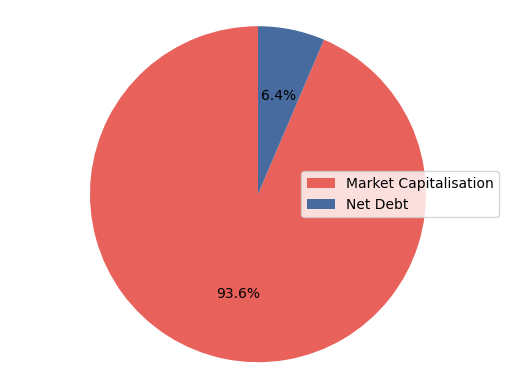

In [ ]:
import matplotlib.pyplot as plt
total_value = market_capitalisation_2024 + net_debt
labels = ['Market Capitalisation', 'Net Debt']
a = market_capitalisation_2024/total_value
b = net_debt/total_value
sizes = [a, b]
colors = ['#e8615b','#476b9e' ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="best")
plt.show()

##**FERRAGAMO WACC**

In [ ]:
current_price = ferragamo.history(period="1d")['Close'].iloc[-1]
market_capitalisation_f=(current_price*ferragamo.info['sharesOutstanding'])
market_capitalisation_f

1575836079.6131592

In [ ]:
net_debt_f=486700000
V=market_capitalisation_f+net_debt_f
WACC_ferr=(market_capitalisation_f/V)* r_ferr+ (net_debt_f/V)*Rd_ferr
WACC_ferr

0.09825060455583035

In [ ]:
af_WACC_ferragamo=(market_capitalisation_f/V)* r_ferr+ (net_debt_f/V)*Rd_ferr*(1-0.26)
af_WACC_ferragamo

0.09661639367736997

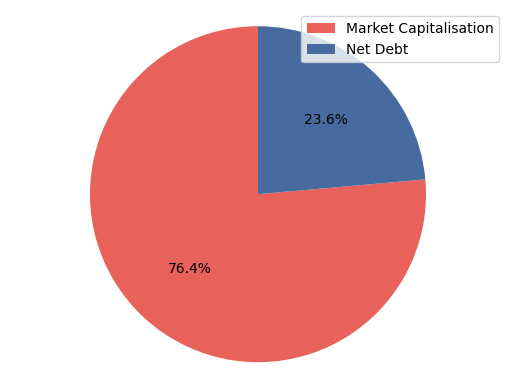

In [ ]:
import matplotlib.pyplot as plt
total_value = market_capitalisation_f+ net_debt_f
labels = ['Market Capitalisation', 'Net Debt']
sizes = [market_capitalisation_f, net_debt_f]
colors = ['#e8615b','#476b9e']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.legend(labels, loc="best")
plt.show()

# **PORTFOLIO WITH FERRAGAMO AND LVMH**

 Even with two firms, portfolio optimization is important as it helps manage risk and improve the investment's risk-return profile.

In our case For LVMH and Ferragamo, analyzing the correlation between their returns will be key in understanding how much diversification benefit can be achieved. In this part we would look for historical data to calculate their correlation coefficient to guide investment decisions effectively.

Expectetions:
Given that both LVMH and Ferragamo are luxury brands,we expect a higher degree of correlation compared to pairing a luxury brand with a company from a completely different sector. However, diversification can still be worthwhile if the correlation isn't perfect. Even a moderately high correlation doesn't negate the benefits of diversification entirely; it merely reduces them. The specific attributes and performance dynamics of each company can still lead to different risk-return profiles that could benefit from strategic capital allocation.


In [ ]:
data = yf.download(['SFER.MI', 'MC.PA'], start='2019-01-01', end='2024-04-17')['Adj Close']
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[*********************100%%**********************]  2 of 2 completed


Ticker
MC.PA      0.265303
SFER.MI   -0.047801
dtype: float64
Ticker      MC.PA   SFER.MI
Ticker                     
MC.PA    0.085008  0.062010
SFER.MI  0.062010  0.128044


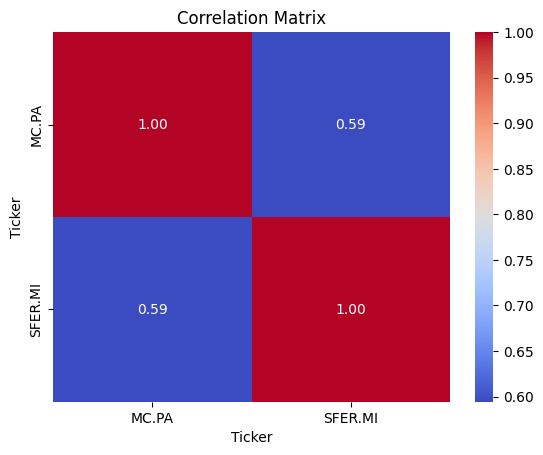

In [ ]:
# Calculate daily returns

returns = data.pct_change()
mean_returns = returns.mean() *252
print(mean_returns)
covariance_matrix = returns.cov()*(252) #To annualize the daily standard deviation we multiply it with √252(= number for business days in a year)
print(covariance_matrix)

correlation_matrix = returns.corr()
correlation_matrix

# Assuming 'correlation_matrix' is already computed from the previous steps
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()


 let us annualize the daily returns over the period we considered. We assume the number of trading days in a year is computed as follows: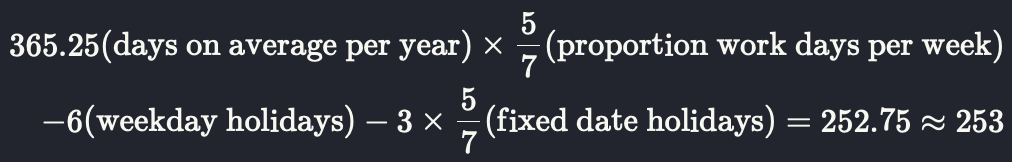




From the output we can see that:
*On avarege ferragamo has negative returns (-0.047801).

*Both LVMH and Ferragamo show positive covariance, suggesting they often move in
tandem, which might reduce the effectiveness of diversification between just these two stocks in reducing portfolio risk.

*The variance (and therefore volatility) of Ferragamo is higher than that of LVMH , indicating it is the riskier stock of the two.

*We obtained a correlation of 0.59 wich is considered strong but as much as we expected considering the similarities of the firms. This can be due to the fact that the correlation is calculated based on returns .

Therefore we will define functions to calculate portfolio performance and simulate random portfolio weights to find the optimal portfolio.



Expectations: taking in consideration this insight we expect an optimal portfolio to be manly composed by LVMH. But lets simulate it...

In [ ]:
# Number of portfolios to simulate
num_portfolios = 10000
risk_free_rate = 0.0229

def portfolio_annual_performance(weights, mean_returns, covariance_matrix):
    returns = np.sum(mean_returns*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return std, returns

   # the function above is calculating the expected annual performance of a portfolio.

def random_portfolios(num_portfolios, mean_returns, covariance_matrix, risk_free_rate):

#Generates several random portfolios to simulate different weight distributions and calculates their performance.

    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(['SFER.MI', 'MC.PA']))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annual_performance(weights, mean_returns, covariance_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

results, weights = random_portfolios(num_portfolios, mean_returns, covariance_matrix, risk_free_rate)

We can visualize the distribution of these portfolios to find the Efficient Frontier.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Sharpe Ratio: 0.8312666762473446
Annualized Return: 0.27
Annualized Volatility: 0.29


         allocation
Ticker             
MC.PA         99.98
SFER.MI        0.02
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Sharpe Ratio: 0.5744226582126182
Annualized Return: 0.18
Annualized Volatility: 0.28


         allocation
Ticker             
MC.PA         74.17
SFER.MI       25.83


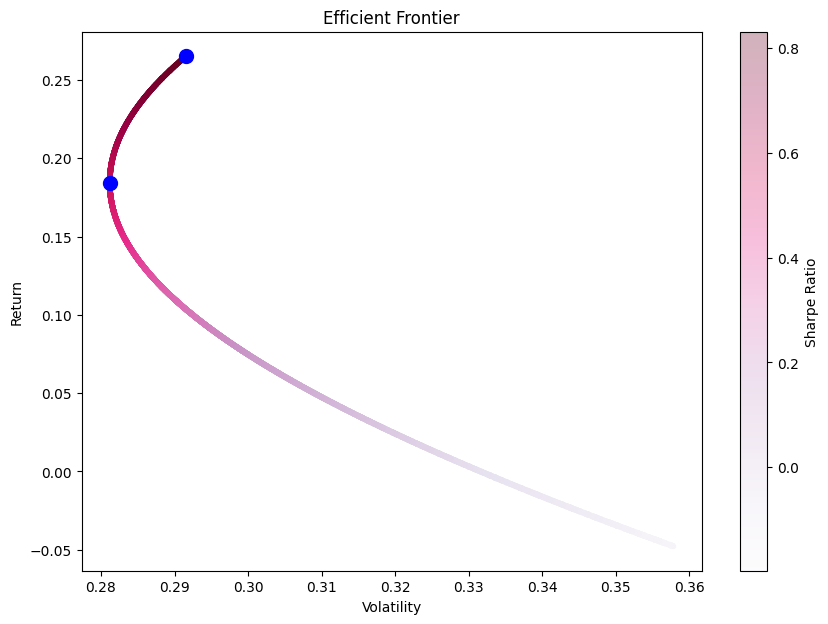

In [ ]:
max_sharpe_idx = np.argmax(results[2])
maxsharpe_r= results[2,max_sharpe_idx]
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=data.columns, columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]

min_vol_idx = np.argmin(results[0])
minsharpe_r= results[2,min_vol_idx]
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=data.columns, columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]

print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print("Sharpe Ratio:", maxsharpe_r)
print("Annualized Return:", round(rp,2))
print("Annualized Volatility:", round(sdp,2))
print("\n")
print(max_sharpe_allocation)
print("-"*80)
print("Minimum Volatility Portfolio Allocation\n")
print("Sharpe Ratio:", minsharpe_r)
print("Annualized Return:", round(rp_min,2))
print("Annualized Volatility:", round(sdp_min,2))
print("\n")
print(min_vol_allocation)

plt.figure(figsize=(10, 7))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='PuRd', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(sdp,rp,'bo', markersize=10.0)
plt.plot(sdp_min,rp_min,'bo', markersize=10.0)
plt.show()

#https://www.gurufocus.com/term/volatility/LVMHF su questo sito la volatility è 25 di lvmh quindi forse va bene#min return mettiamo re di tutte edue std storica

We got some interasting results, the optimal Maximum Sharpe portfolio is only composed by LVMH , and if we add ferragamo like in the Minimum Volatility Portfolio Allocation we can notice that the volatility decrease only by 1 figure while the return significatnly drop .
To further investigate this outcome we also tried to build an equally balanced portfolio.

##50% & 50% Portfolio


In [ ]:

# Set portfolio weights: 50% Ferragamo, 50% LVMH
weights = np.array([0.5, 0.5])

# Calculate expected portfolio performance
portfolio_return = np.sum(mean_returns * weights)  # Annual return
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# Print the expected annual return and volatility of the 50/50 portfolio
print(f"Expected annual return of the 50/50 portfolio: {portfolio_return:.4f}")
print(f"Annual volatility of the 50/50 portfolio: {portfolio_std_dev:.4f}")

# Compare with individual stock performance
individual_perf = pd.DataFrame(index=data.columns)
individual_perf['Annual Return'] = mean_returns
individual_perf['Volatility'] = returns.std() * np.sqrt(252)

print(individual_perf)

Expected annual return of the 50/50 portfolio: 0.1088
Annual volatility of the 50/50 portfolio: 0.2903
         Annual Return  Volatility
Ticker                            
MC.PA         0.265303    0.291561
SFER.MI      -0.047801    0.357832


**Risk-Return Scatter Plot**

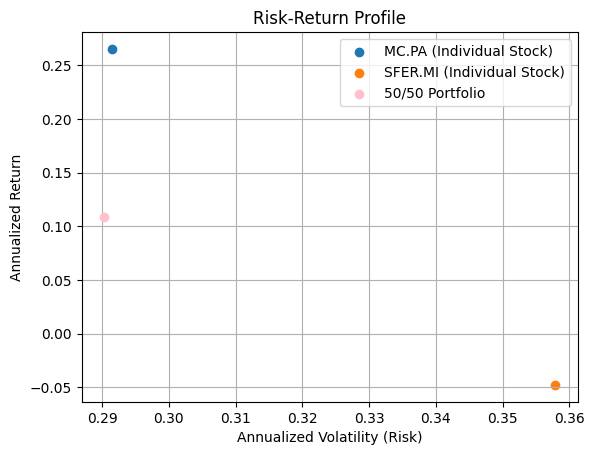

In [ ]:
import matplotlib.pyplot as plt

# Individual Stocks Data
stocks_data = {
    'MC.PA': {'Return': individual_perf['Annual Return'][0], 'Volatility':individual_perf['Volatility'][0]},
    'SFER.MI': {'Return': individual_perf['Annual Return'][1], 'Volatility': individual_perf['Volatility'][1]}
}

# 50/50 Portfolio Data
portfolio_data = {'Return': 0.1088, 'Volatility': 0.2903}

# Create a scatter plot for individual stocks
for stock, values in stocks_data.items():
    plt.scatter(values['Volatility'], values['Return'], label=f"{stock} (Individual Stock)")

# Add the 50/50 portfolio to the scatter plot
plt.scatter(portfolio_data['Volatility'], portfolio_data['Return'], color='pink', label="50/50 Portfolio", zorder=5)

# Plot settings
plt.title('Risk-Return Profile')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return')
plt.legend()
plt.grid(True)
plt.show()

50/50 Portfolio
Expected Annual Return (10.88%): This is the average return we would expect if the future performance mimics the historical average. It's lower than LVMH's past performance but higher than Ferragamo's. This is a blended return that averages out the individual performances of both stocks in our equally weighted portfolio.

Annual Volatility ( 29.03%): This represents the standard deviation of the portfolio's returns, which is a common measure of risk. It indicates that the portfolio's return can be expected to deviate from the average by about 29.03% in any given year. Interestingly, this portfolio volatility is almost the same as LVMH's volatility and lower than Ferragamo's, suggesting that the inclusion of LVMH helps to mitigate the higher risk of Ferragamo but actually addinding ferragamo do not decrease the volatility at all as we can see in our first allocation.

Individual Stocks
LVMH Annual Return (26.53): LVMH has performed exceptionally well historically with a high return rate. This robust performance significantly influences the combined portfolio's return.

LVMH Volatility (29.16%): The volatility is high, indicating that the returns vary widely year over year. This suggests a higher risk, which is typical for stocks with higher returns.

Ferragamo Annual Return (-4%): Ferragamo's returns are much lower than LVMH's, indicating that it hasn't performed well historically in terms of return.

Ferragamo Volatility (35.78%): Despite its lower returns, Ferragamo has higher volatility than LVMH, indicating a higher risk and less stable returns.

Interpretation of the Combined Portfolio:
Diversification Benefit: The portfolio's volatility is slightly less than the average of the individual volatilities of the stocks, which suggests that there is some diversification benefit. However, because both stocks are from the same sector and might be subject to similar market forces, this benefit is not as significant as it might be with stocks from different sectors and in addition ferragamo performance is very bad.

Risk-Return Trade-off: By combining these two stocks, we have created a portfolio that has a lower return than LVMH alone but higher than Ferragamo. The risk (as measured by volatility) is nearly the same as investing in LVMH alone, which suggest that, given historical data, an investor would prefer a 100% investment in LVMH for a similar level of risk but with a higher return.



---

## REPLACE STOCK RETURNS WITH CAPM

As we saw ferragamo had a negative mean return, so now we will consider the expected returns of both firms using capm that we calculated previously .

In [ ]:
new_ret = pd.Series([r,r_ferr])

def portfolio_annual_performance(weights, new_ret, covariance_matrix):
    returns = np.sum(new_ret *weights )
    std = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return std, returns

   # the function above is calculating the expected annual performance of a portfolio.

def random_portfolios(num_portfolios, new_ret, covariance_matrix, risk_free_rate):

#Generates several random portfolios to simulate different weight distributions and calculates their performance.

    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(['SFER.MI', 'MC.PA']))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annual_performance(weights, new_ret, covariance_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

results, weights = random_portfolios(num_portfolios, new_ret, covariance_matrix, risk_free_rate)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Sharpe Ratio: 0.27342129308548163
Annualized Return: 0.11
Annualized Volatility: 0.34


         allocation
Ticker             
MC.PA         12.46
SFER.MI       87.54
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Sharpe Ratio: 0.2287405509525557
Annualized Return: 0.09
Annualized Volatility: 0.28


         allocation
Ticker             
MC.PA         74.17
SFER.MI       25.83


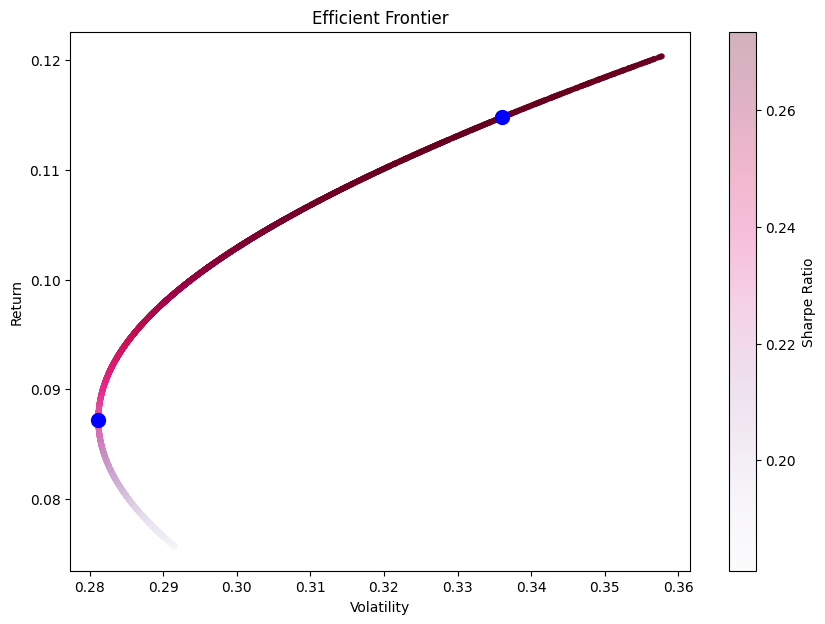

In [ ]:
max_sharpe_idx = np.argmax(results[2])
maxsharpe_r= results[2,max_sharpe_idx]
sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=data.columns, columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]

min_vol_idx = np.argmin(results[0])
minsharpe_r= results[2,min_vol_idx]
sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=data.columns, columns=['allocation'])
min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]

print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation\n")
print("Sharpe Ratio:", maxsharpe_r)
print("Annualized Return:", round(rp,2))
print("Annualized Volatility:", round(sdp,2))
print("\n")
print(max_sharpe_allocation)
print("-"*80)
print("Minimum Volatility Portfolio Allocation\n")
print("Sharpe Ratio:", minsharpe_r)
print("Annualized Return:", round(rp_min,2))
print("Annualized Volatility:", round(sdp_min,2))
print("\n")
print(min_vol_allocation)

plt.figure(figsize=(10, 7))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='PuRd', marker='o', s=10, alpha=0.3)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(sdp,rp,'bo', markersize=10.0)
plt.plot(sdp_min,rp_min,'bo', markersize=10.0)
plt.show()

With this new outcome we observe a completely different situation. In particular we see that the returns of both portfolios decreased importantly, however the volatility remained similar to the old one. This reflects perfectly the fact that we modified the mean returns replacing them with the cost of equity calculated previously with the CAPM.
In the first portfolio we can see that the majority is allocated to Ferragamo, while the remaining part to LVMH, indeed we can see that the volatility of the portfolio is very close to the individual volatility of Ferragamo. In the second one of course we see the opposite case.

In the context of the provided analysis, the Sharpe ratio of both the Maximum Sharpe Ratio (MSR) and Minimum Volatility (MinVol) portfolios changed significantly after transitioning from historical returns to CAPM-adjusted returns.
The decrease in Sharpe ratio suggests that the risk-adjusted returns of the portfolios declined after incorporating CAPM-adjusted expected returns. This indicates that the risk taken on by the portfolios may not be adequately compensated by the expected returns estimated using CAPM.



---

#GROWTH OR VALUE STOCKS
high book-to-market-value stocks (i.e., value stocks) and low book-to-market-value stocks (i.e., growth stocks). Value stocks here are defined as those with high ratios of book value to market value. Growth stocks are those with low ratios of book to market.

Growth stocks are those of companies that are considered to have the potential to outperform the overall market over time because of their future potential. Value stocks are classified as companies that are currently trading below what they are really worth and will thus provide a superior return.

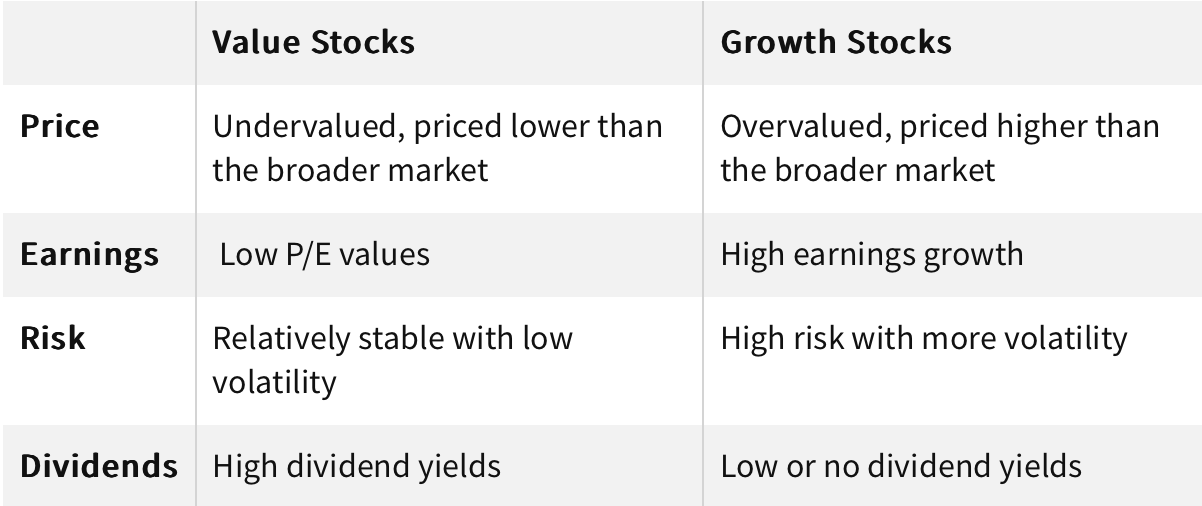

#payout policy lvmh stock rep

This report examines LVMH's financial strategy concerning its dividend payouts, stock repurchase and issuance programs from 2019 to 2023. We analyze the impact of these strategies on the company's market capitalization, debt, capital structure, stock price, and earnings per share (EPS). The findings suggest that LVMH's aggressive stock repurchase strategy, adjustments in dividend payments, and debt management have contributed significantly to enhancing shareholder value and maintaining financial stability.

Overview of Financial Strategies and Market Response:
Dividend Policy Changes:
LVMH adjusted its dividends, particularly noticeable with a decrease in 2020 due to the COVID-19 pandemic, followed by an increase in 2022 and a sharp decrease in 2023. These adjustments reflect the company's response to external economic conditions and internal cash flow management.
Stock Repurchase and Issuance:
The company undertook substantial stock repurchases from 2021 to 2023, following a less aggressive approach in 2019 and 2020. Negative figures indicate repurchases, with amounts increasing significantly to -€552 million in 2021, -€1604 million in 2022, and -€1569 million in 2023. These actions were aimed at reducing the number of shares outstanding, thereby potentially increasing the EPS and signaling confidence to investors.
Impact Analysis:
Market Capitalization:
LVMH's market cap showed substantial growth, peaking in 2021 at €414.55 billion. This growth correlates with the company's aggressive buyback program, suggesting a positive market reception and an appreciation of LVMH’s growth prospects and financial health.
Debt Management:
LVMH's total debt increased significantly in 2020 (€47.43 billion), possibly to provide liquidity during the pandemic. However, subsequent years saw a reduction in debt, aligning with a strategy of using improved cash flows not only for repurchases but also for prudent debt management.
Capital Structure:
The aggressive repurchase of shares and the management of debt levels reflect a strategic shift in LVMH’s capital structure, aimed at optimizing shareholder value while maintaining financial flexibility.
Stock Price and EPS:
The stock price increased significantly from €300 in March 2020 to €900 in July 2023 before adjusting to around €800. This increase in stock price, along with an increase in EPS from €14.25 in 2019 to €30.34 in 2023, illustrates the efficacy of the repurchase strategy and its favorable reception by the market.
EPS growth was likely bolstered by the reduced number of shares outstanding, which enhances the profitability per share, making the stock more attractive to investors.
Conclusions and Strategic Recommendations:
Efficiency of Repurchase Strategy:
LVMH's stock repurchase strategy has effectively enhanced EPS and supported the stock price during volatile market conditions. This strategy not only signals management’s confidence in the company’s valuation but also offers a tax-efficient way to return capital to shareholders.
Dividend Adjustments:
The fluctuation in dividend payouts reflects a flexible approach, adapting to economic conditions and maintaining a balance between rewarding shareholders and retaining cash for operational stability and growth.
Long-term Financial Health:
LVMH should continue to monitor its capital structure closely, balancing between leveraging opportunities for growth and maintaining a buffer for economic downturns. The current approach of careful debt management combined with strategic repurchases and adaptable dividend policies appears to be sustainable and in line with the company's long-term financial goals.


When crafting a payout policy for a corporation like LVMH, which has demonstrated a sophisticated approach to managing dividends and stock repurchases, the following elements should be considered to create an effective and responsive policy:

1. Objectives of the Payout Policy
Maximize Shareholder Value: Ensure that the payout strategy aligns with shareholder interests by balancing dividend payments and share repurchases to maximize earnings per share and overall return.
Signal Financial Health: Use the payout policy as a tool to communicate confidence in the company's financial stability and growth prospects to the market.
Maintain Flexibility: Retain sufficient cash flow to fund ongoing operations and future growth opportunities while returning excess capital to shareholders.
2. Dividend Policy Components
Stable or Growing Dividends: Aim to provide a stable or gradually increasing dividend payout ratio that is sustainable based on the company’s long-term earnings outlook.
Dividend Yield Targeting: Maintain a competitive dividend yield that aligns with industry standards and investor expectations.
Payout Ratio: Set a target payout ratio that reflects the company's maturity and cash flow stability, adjusting as necessary based on economic conditions and company performance.
3. Share Repurchase Strategy
Counter-Cyclical Repurchases: Implement share repurchases when the stock is perceived to be undervalued, effectively using the company’s capital to buy back shares at a discount.
Flexible Implementation: Maintain flexibility in repurchase plans to adjust the volume of buybacks according to market conditions and internal cash requirements.
Communicating the Rationale: Clearly communicate the rationale for share repurchases to shareholders, explaining how these actions fit into the broader financial strategy and benefit shareholder value.
4. Balancing Dividends and Repurchases
Integration with Financial Planning: Ensure that decisions on dividends and repurchases are integrated with overall financial planning, taking into consideration the company’s investment needs, debt levels, and liquidity requirements.
Market Conditions: Respond to market conditions and investor sentiment, recognizing when dividends or repurchases might be more favorable under current tax laws and market trends.
Shareholder Demographics: Consider the preferences and tax situations of the shareholder base, which can influence whether dividends or repurchases are more beneficial for the majority of shareholders.
5. Legal and Regulatory Compliance
Compliance with Laws: Adhere to all legal and regulatory requirements in the jurisdictions where the company operates, particularly concerning payout policies and insider trading laws during repurchase periods.
Transparent Reporting: Maintain transparency in reporting dividend and repurchase activities in financial statements and public disclosures to ensure shareholders and regulatory bodies are well-informed.
6. Review and Adjustment
Regular Review: Regularly review the payout policy to ensure it remains aligned with the company’s strategic goals and financial health.
Adjustments: Be prepared to adjust the policy in response to significant changes in the company’s operations, the economic environment, or tax legislation that could impact the effectiveness of the payout strategy.

#payout policy ferragamo
Constructing Ferragamo's Payout Policy: Analysis and Recommendations
Overview of Financial Data:
From the data provided, Ferragamo's financial performance and position exhibit fluctuating dividends, significant changes in free cash flow, a varied stock repurchase strategy, inconsistent stock prices, a relatively stable EPS with a downturn in recent years, and manageable but fluctuating debt levels. The company’s market capitalization has also been decreasing, indicating a potential loss of investor confidence or market challenges.

Key Financial Observations:
Dividends:
Dividends were absent in 2020 and 2021, likely due to the impact of COVID-19 on business operations and financial stability.
A return to dividend payments in 2022 and a reduction in 2023 and 2024 suggest cautious financial management in response to fluctuating cash flows and earnings.
Free Cash Flow:
The significant variation in free cash flow indicates operational fluctuations. A sharp increase in 2021 could suggest recovery or an accumulation of cash due to reduced operational costs or capital expenditures.
Cash Repurchase of Equity:
Share repurchases in 2019, 2021, and 2022 with significant increase in 2022 indicate an attempt to support the stock price and return capital to shareholders during periods of higher cash availability.
Stock Price and EPS:
Stock prices have generally declined, reflecting possible market concerns about the company's growth prospects or profitability.
The EPS saw recovery in 2021 and then a subsequent decrease, aligning with the overall reduction in profitability and operational performance.
Debt and Market Cap:
The debt level remained relatively low, indicating a conservative approach to leverage. However, the rising market cap until 2021 followed by a decline suggests shifting investor perceptions regarding company valuation.
Constructing a Payout Policy:
Considering Ferragamo's financial data and strategic needs, the payout policy should aim to stabilize shareholder returns while preserving financial flexibility to support operational and strategic objectives.

1. Dividend Strategy:
Stable, Conservative Dividend: Given the volatility in free cash flow and earnings, a conservative dividend policy with a lower, stable payout ratio is advisable. This would reassure investors of the company’s commitment to providing returns while maintaining enough liquidity to fund operations and strategic investments.
Flexibility Clause: Include a clause allowing for dividend adjustments based on annual free cash flow and long-term earnings projections. This ensures dividends are sustainable and aligned with financial performance.
2. Share Repurchase Plan:
Opportunistic Buybacks: Continue with an opportunistic approach to share buybacks, executing them in years where free cash flow is strong and the stock price is perceived to be undervalued. This not only enhances EPS but also provides a signal of confidence in the company’s value.
Limitation on Buybacks: Set annual limits on buybacks as a percentage of free cash flow to ensure they do not compromise other financial obligations or strategic initiatives.
3. Capital Structure Management:
Moderate Leverage: Maintain a moderate level of debt to preserve financial stability and flexibility. Use debt judiciously to finance strategic growth initiatives that are expected to generate higher returns.
Debt Monitoring: Regularly review debt levels in relation to cash flows and earnings to ensure that the capital structure supports both stability and strategic growth.
4. Communication and Transparency:
Clear Communication: Clearly communicate the rationale behind dividend and buyback decisions in annual reports and shareholder meetings. Transparency about financial decisions will build trust with investors.
Regular Review: Implement annual reviews of the payout policy, adjusting it as necessary based on the company's financial condition, market environment, and strategic goals.
Conclusion:
Ferragamo's payout policy should balance the need to provide stable returns to shareholders through dividends and share repurchases with the need to maintain sufficient cash reserves for operational flexibility and strategic growth. By adopting a conservative yet flexible approach to dividends and a strategic, opportunistic approach to share buybacks, Ferragamo can effectively manage its capital structure while supporting shareholder value in a volatile market environment.




Stock Repurchase/Issue and Its Effects:
Earnings Per Share (EPS) Impact:
Repurchases Generally Boost EPS: By reducing the number of outstanding shares, stock repurchases increase EPS, all else being equal. This can be seen in Ferragamo's activities, where despite fluctuating profitability, EPS in 2021 and 2022 showed some resilience, which could be partially attributed to reduced share counts in those years.
2022 Repurchase and EPS: The large stock repurchase in 2022 (-€42.67 million) likely helped stabilize the EPS at €0.42, despite less favorable economic conditions.
Market Capitalization:
Impact Through Investor Perception: Share repurchases often signal to the market that management believes the stock is undervalued, which can bolster investor confidence and potentially support or increase the stock price in the short term. However, in Ferragamo’s case, while there were aggressive repurchases in 2022, the market cap continued to decline through 2023 and 2024, suggesting that other factors, such as overall declining sales or profitability and market conditions, had a more substantial negative impact.
Long-term Decline in Market Cap: Despite repurchase efforts, the long-term decline in market cap indicates that repurchases were not sufficient to offset broader negative market sentiments or operational challenges.
Debt Levels:
Capital Allocation Decisions: Ferragamo's conservative approach to debt, with only modest increases in certain years, shows a cautious use of leverage. The stock repurchases in years like 2021 and 2022 did not coincide with large increases in debt, suggesting these were likely funded through operational cash flows or existing cash reserves.
Financial Flexibility: The ability to execute repurchases without significantly increasing debt levels indicates good financial management and helps maintain a robust capital structure, ensuring that the company is not over-leveraged.
Capital Structure:
Leverage and Shareholder Equity: Stock repurchases reduce shareholder equity by converting part of it into treasury shares, thus impacting the equity side of the balance sheet. This can lead to a higher debt-to-equity ratio, assuming debt levels remain constant or increase. In Ferragamo's case, the relatively stable debt levels combined with the stock repurchases suggest a controlled approach to managing its leverage, with careful consideration not to overly skew the balance between debt and equity.
Impact on Financial Stability and Risk: Reducing the number of shares through repurchases can make the company more susceptible to market volatility if not balanced with adequate cash reserves and a solid debt management strategy.
Summary:
The stock repurchase activities of Ferragamo have had mixed impacts on its financial metrics. While theoretically designed to enhance EPS and shareholder value, the effectiveness of these repurchases appears to have been mitigated by broader market and operational challenges. The continued decline in market cap, despite significant repurchases, suggests that underlying business factors and possibly investor confidence in the company's growth prospects or operational efficiency played a more significant role.

Stock repurchases did not lead to an increase in debt to risky levels, indicating prudent financial management. However, the overall decline in market capitalization and varying stock prices reflect the complex interplay between market perceptions, company performance, and repurchase activities. A careful review and possibly a recalibration of the strategy might be necessary to align these activities more closely with achieving long-term shareholder value.